In [414]:
###Download data###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels
import statsmodels.api as sm
import fix_yahoo_finance as yf


x = yf.download('WMT','2010-01-01','2018-12-31')
y = yf.download('TGT','2010-01-01','2018-12-31')


[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [415]:
X = x['Adj Close']
Y = y['Adj Close']

In [416]:
X

Date
2009-12-31     42.548668
2010-01-04     43.169579
2010-01-05     42.739723
2010-01-06     42.644184
2010-01-07     42.668079
2010-01-08     42.453140
2010-01-11     43.153675
2010-01-12     43.567612
2010-01-13     43.790508
2010-01-14     43.153675
2010-01-15     42.731777
2010-01-19     43.010376
2010-01-20     42.875057
2010-01-21     42.126759
2010-01-22     42.142685
2010-01-25     42.094917
2010-01-26     42.676022
2010-01-27     42.508873
2010-01-28     41.879993
2010-01-29     42.532749
2010-02-01     42.572544
2010-02-02     42.580509
2010-02-03     43.201427
2010-02-04     42.166565
2010-02-05     42.548668
2010-02-08     42.134720
2010-02-09     42.389454
2010-02-10     42.381500
2010-02-11     42.254128
2010-02-12     42.110847
                 ...    
2018-11-14    100.978951
2018-11-15     98.999756
2018-11-16     97.159798
2018-11-19     96.254730
2018-11-20     93.648956
2018-11-21     93.658897
2018-11-23     94.583847
2018-11-26     94.633583
2018-11-27     94.52

In [417]:
Y

Date
2009-12-31    37.661591
2010-01-04    37.801727
2010-01-05    37.941883
2010-01-06    38.665997
2010-01-07    39.140945
2010-01-08    38.985226
2010-01-11    39.070877
2010-01-12    38.416832
2010-01-13    38.416832
2010-01-14    39.008595
2010-01-15    39.063084
2010-01-19    39.865074
2010-01-20    39.491322
2010-01-21    39.102013
2010-01-22    39.226601
2010-01-25    39.530266
2010-01-26    40.503525
2010-01-27    40.456806
2010-01-28    40.417866
2010-01-29    39.919556
2010-02-01    39.779415
2010-02-02    39.569180
2010-02-03    39.397888
2010-02-04    38.206612
2010-02-05    38.385693
2010-02-08    37.980801
2010-02-09    38.261116
2010-02-10    38.113178
2010-02-11    38.276688
2010-02-12    37.871815
                ...    
2018-11-14    82.446060
2018-11-15    80.095566
2018-11-16    79.024452
2018-11-19    77.150002
2018-11-20    69.029999
2018-11-21    69.260002
2018-11-23    67.349998
2018-11-26    69.250000
2018-11-27    71.379997
2018-11-28    71.879997
2018-11-29 

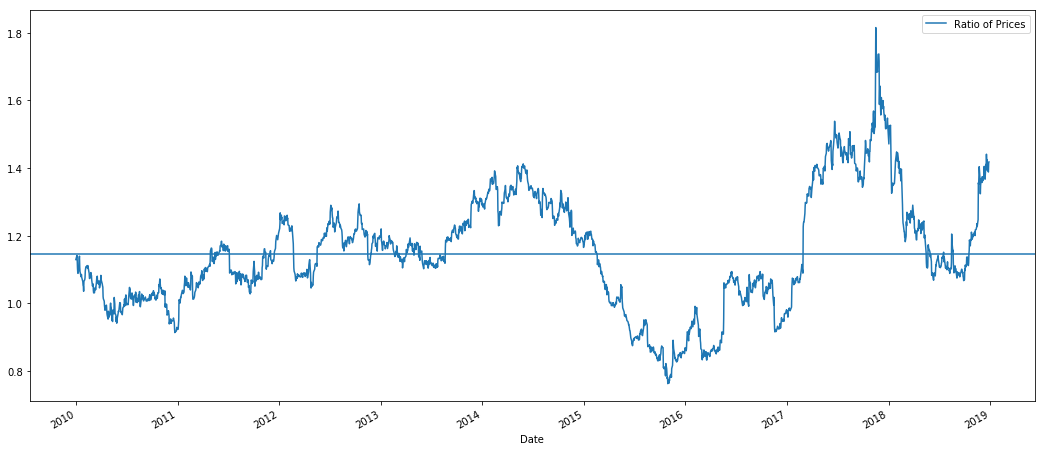

In [418]:
Ratio = X / Y
Ratio.plot(figsize=(18,8))
plt.axhline(Ratio.mean())
plt.legend(['Ratio of Prices'])
plt.show()

In [419]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

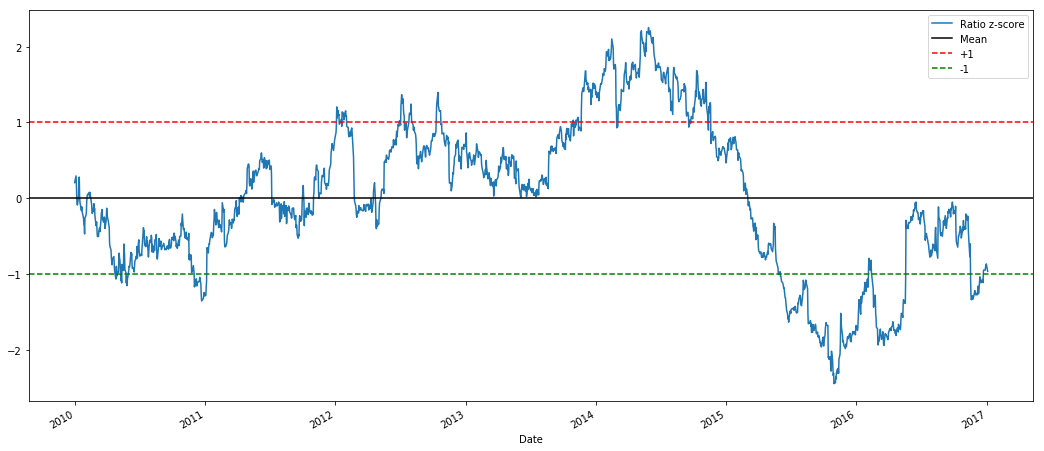

In [420]:
###Plot Zscores of the ratios###
zscore(ratios).plot(figsize=(18,8))
plt.axhline(zscore(ratios).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Ratio z-score', 'Mean', '+1', '-1'])
plt.show()

In [421]:
train = ratios[:1764]
test = ratios[1764:]

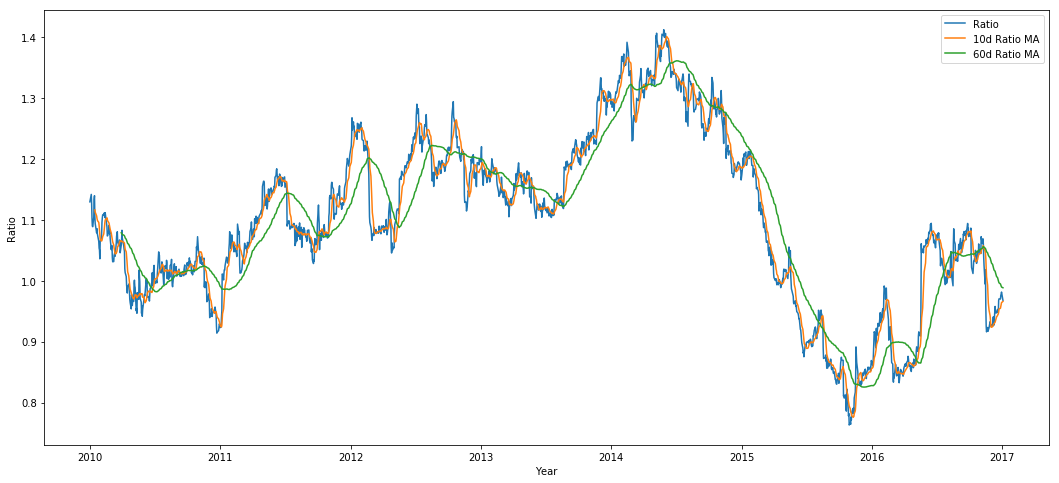

In [422]:
###Zscores for the 10day moving average using 60day moving avg as mean and 60std as std###
ratios_mavg10 = train.rolling(window=10).mean()

ratios_mavg60 = train.rolling(window=60).mean()

std_60 = train.rolling(window=60).std()

zscore_60_10 = (ratios_mavg10 - ratios_mavg60)/std_60
plt.figure(figsize=(18,8))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg10.index, ratios_mavg10.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)

plt.legend(['Ratio','10d Ratio MA', '60d Ratio MA'])

plt.xlabel('Year')
plt.ylabel('Ratio')
plt.show()

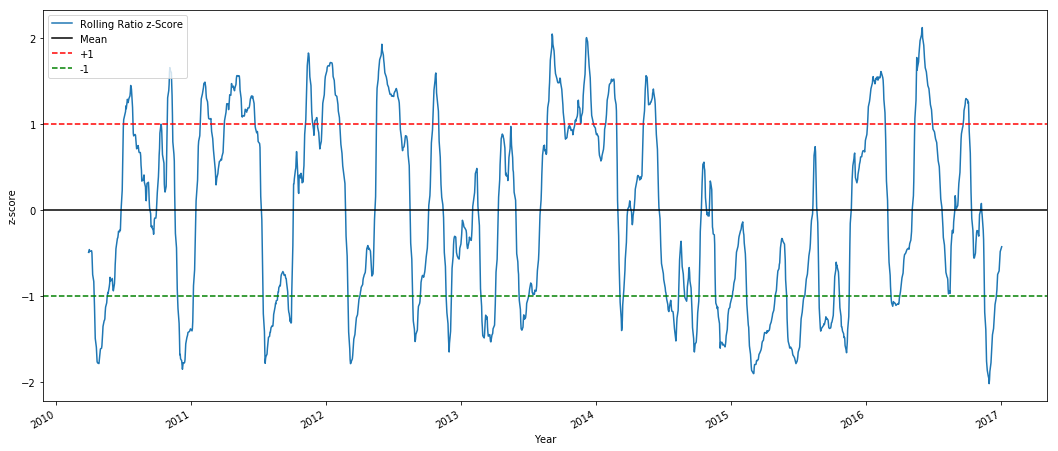

In [423]:
std_60 = train.rolling(window=60).std()
std_60.name = 'std 60d'
zscore_60_10 = (ratios_mavg10 - ratios_mavg60)/std_60
zscore_60_10.name = 'z-score'

plt.figure(figsize = (18,8))
zscore_60_10.plot()
plt.axhline(0, color = 'black')
plt.axhline(1.0, color = 'red', linestyle = '--')
plt.axhline(-1.0, color = 'green', linestyle = '--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])

plt.xlabel('Year')
plt.ylabel('z-score')
plt.show()

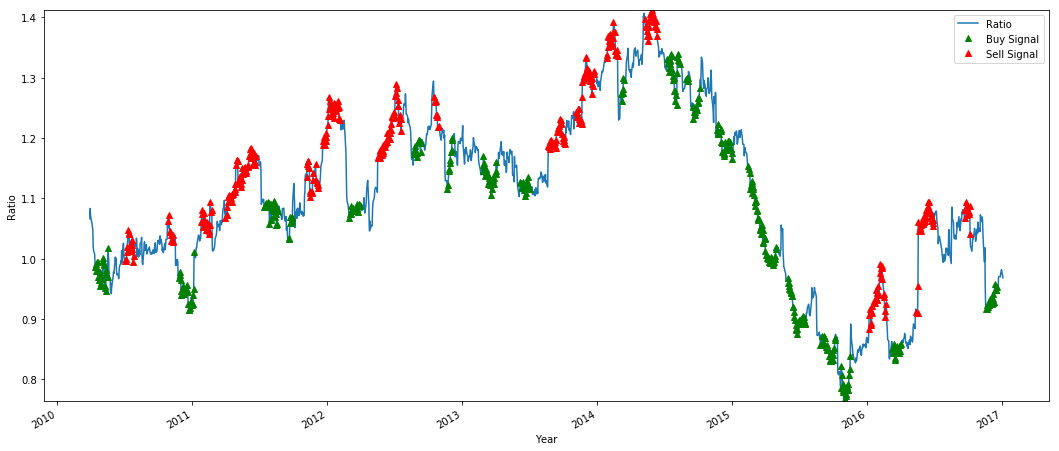

In [424]:
###Plot buy and sell signals###
plt.figure(figsize = (18,8))
train[60:].plot()
buy = train.copy()
sell = train.copy()
buy[zscore_60_10 > -1] = 0
sell[zscore_60_10 < 1] = 0
buy[60:].plot(color = 'g', linestyle = 'None', marker = '^')
sell[60:].plot(color = 'r', linestyle = 'None', marker = '^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min(),ratios.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])

plt.xlabel('Year')
plt.ylabel('Ratio')
plt.show()

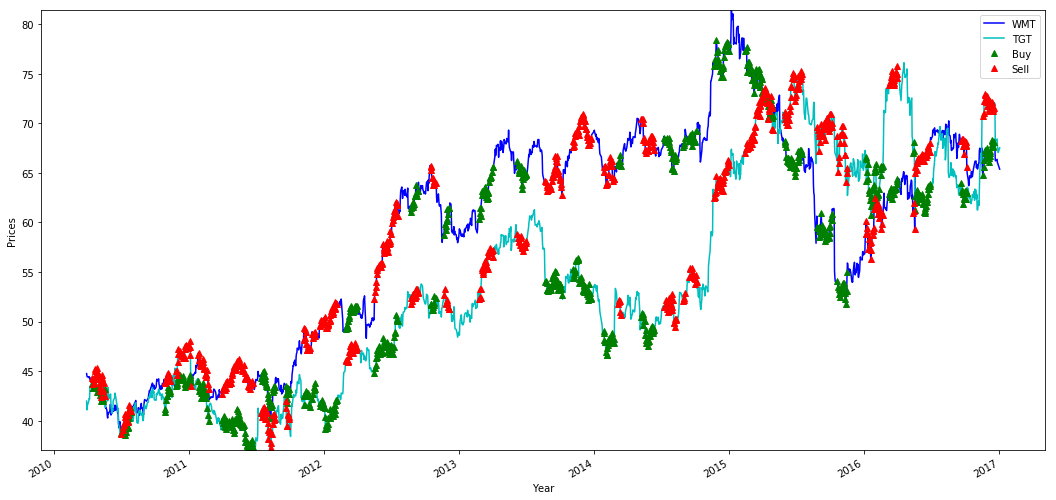

In [425]:
###Plot the prices and buy and sell signals from Zscore###
plt.figure(figsize=(18,9))
X = X.iloc[:1764]
Y = Y.iloc[:1764]
X[60:].plot(color = 'b')
Y[60:].plot(color = 'c')
buyR = 0*X.copy()
sellR = 0*Y.copy()

###Buying the ratio = buy X and sell Y###
buyR[buy != 0] = X[buy != 0]
sellR[buy != 0] = Y[buy != 0]
###Selling the ratio= sell X and buy Y### 
buyR[sell != 0] = Y[sell != 0]
sellR[sell != 0] = X[sell != 0]

buyR[60:].plot(color = 'g', linestyle = 'None', marker = '^')
sellR[60:].plot(color = 'r', linestyle = 'None', marker = '^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1, x2, min(X.min(), Y.min()), max(X.max(), Y.max())))

plt.legend(['WMT','TGT', 'Buy', 'Sell'])
plt.xlabel('Year')
plt.ylabel('Prices')
plt.show()

In [426]:
def trade(A, B, window1, window2):
    if (window1 == 0) or (window2 == 0):
        return 0
    ratios = A/B
    ma1 = ratios.rolling(window=window1).mean()
    ma2 = ratios.rolling(window=window2).mean()
    std = ratios.rolling(window=window2).std()
    zscore = (ma1 - ma2)/std

    money = 0
    countA = 0
    countB = 0
    for i in range(len(ratios)):

        if zscore[i] > 1:
            money += A[i] - B[i] * ratios[i]
            countA -= 1
            countB += ratios[i]
        elif zscore[i] < -1:
            money -= A[i] - B[i] * ratios[i]
            countA += 1
            countB -= ratios[i]
        elif abs(zscore[i]) < 0.5:
            money += countA*A[i] - B[i] * countB
            count = 0
            
    return money


In [427]:
trade(X.iloc[:1764], Y.iloc[:1764], 60, 10)

1226767.383624269

In [428]:
trade(X.iloc[1764:], Y.iloc[1764:], 60, 10)

0

In [429]:
###Find the optimal window length in th range [0-252]
length_scores = [trade(X.iloc[:1764], Y.iloc[:1764], l, 10) for l in range(253)]
best_length = np.argmax(length_scores)
print ('Best window length:', best_length)

Best window length: 244


In [430]:
length_scores2 = [trade(X.iloc[1512:], Y.iloc[1512:],l,10) for l in range(253)]
print (best_length, 'day window:', length_scores2[best_length])
best_length2 = np.argmax(length_scores2)
print (best_length2, 'day window:', length_scores2[best_length2])

244 day window: 0.0
77 day window: 279626.66807820846


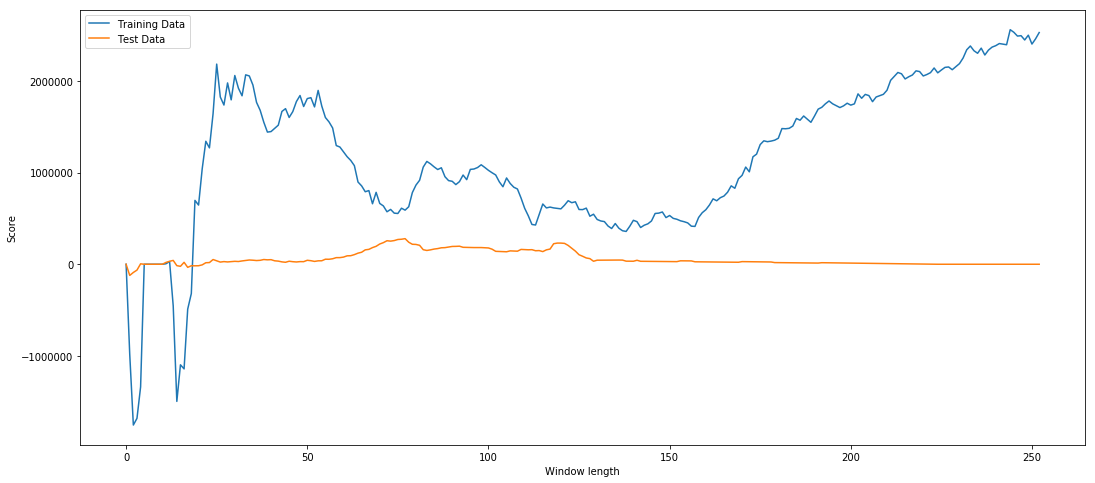

In [431]:
plt.figure(figsize=(18,8))
plt.plot(length_scores)
plt.plot(length_scores2)
plt.xlabel('Window length')
plt.ylabel('Score')
plt.legend(['Training Data', 'Test Data'])
plt.show()